In [5]:
# Importing the necessary modules
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader as web

In [12]:
# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [24]:
# Specifiying parameters
tickers= ['AAPL', 'TSLA', 'META', 'NVDA', 'AMZN', 'GOOG']
amounts =[7, 8, 12, 9, 10, 8]
prices = []
total = []

start = dt.datetime(2023,1,1)
end = dt.datetime.now()

In [25]:
for ticker in tickers:
    data = yf.download(ticker, start, end)
    price = data[-1:]['Close'][0]
    prices.append(price)
    index = tickers.index(ticker)
    total.append(price * amounts[index])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [26]:
print(f'prices: {prices}')
print(f'total: {total}')

prices: [193.60000610351562, 252.5399932861328, 353.3900146484375, 488.29998779296875, 153.4199981689453, 142.72000122070312]
total: [1355.2000427246094, 2020.3199462890625, 4240.68017578125, 4394.699890136719, 1534.1999816894531, 1141.760009765625]


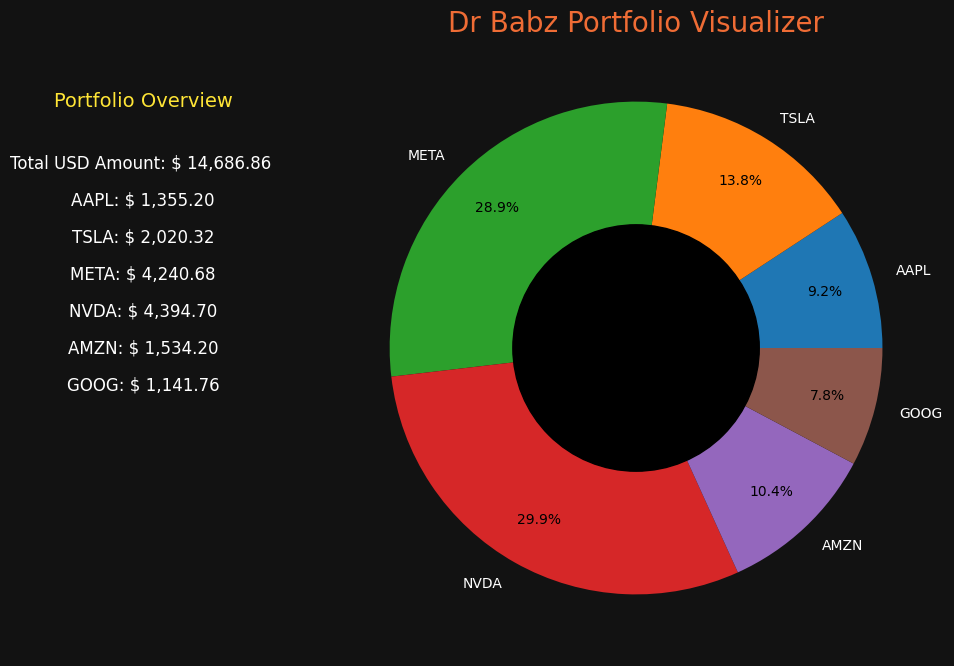

In [42]:
# Plotting the stock portfolio
fig, ax = plt.subplots(figsize=(16,8))
ax.figure.set_facecolor('#121212')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.set_title('Dr Babz Portfolio Visualizer', color="#EF6C35", fontsize=20)

patches, texts, autotexts = ax.pie(total, labels=tickers, autopct="%1.1f%%", pctdistance=0.8)
[text.set_color('white') for text in texts]

# Creating a black circle in the middle
my_circle = plt.Circle((0,0), 0.50, color='black')
plt.gca().add_artist(my_circle)

ax.text(-2, 1, 'Portfolio Overview', fontsize=14, color='#FFE536', verticalalignment='center', horizontalalignment='center')
ax.text(-2, 0.75, f'Total USD Amount: $ {sum(total):,.2f} ', fontsize=12, color='white', verticalalignment='center', horizontalalignment='center')

counter = 0.15
for ticker in tickers:
    ax.text(-2, 0.75 - counter, f'{ticker}: $ {total[tickers.index(ticker)]:,.2f}', fontsize=12, color='white', verticalalignment='center', horizontalalignment='center')
    counter += 0.15

plt.show()